In [1]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import sys
sys.path.append('..')

'''
Graphs and highlights taken from explore.ipynb, of tables {'cases', 'documents', 'points', 'services', 'topics'} dumped oct 18th '21

Service - website, app, etc.
Point - a plain text highlight that summarizes as aspect of their policy. It is often a quote, but doesn't have to be, 
    e.g. "The terms for this service are easy to read". Each point is 1-1 with a Case.
Case - higher-level Service-agnostic patterns that Points exhibit. For example, "No third-party analytics or tracking platforms are used"
Topic - even higher-level patterns, that contain a handful of Cases. For example, "User Choice"
Document - crawled text from a Service
'''

'\nGraphs and highlights taken from the exploratory data analysis done in explore.ipynb, \nof tables {\'cases\', \'documents\', \'points\', \'services\', \'topics\'} dumped on 10/18/21.\nNote this is post-cleaning, so some data is absent such as Points with quoteText that\ndoesn\'t match the current document content from point.quoteStart to point.quoteEnd (~1000 points removed)\n\nService - website, app, etc.\nPoint - a plain text highlight that summarizes as aspect of their policy. It is often a quote, but doesn\'t have to be, \n    e.g. "The terms for this service are easy to read". Each point is 1-1 with a Case.\nCase - higher-level Service-agnostic patterns that Points exhibit. For example, "No third-party analytics or tracking platforms are used"\nTopic - even higher-level patterns, that contain a handful of Cases. For example, "User Choice"\nDocument - crawled text from a Service\n'

In [2]:
VERSION = '181021'
cases = pickle.load(open(f'../data/cases_{VERSION}_clean.pkl', 'rb'))
documents = pickle.load(open(f'../data/documents_{VERSION}_clean.pkl', 'rb'))
points = pickle.load(open(f'../data/points_{VERSION}_clean.pkl', 'rb'))
services = pickle.load(open(f'../data/services_{VERSION}_clean.pkl', 'rb'))
topics = pickle.load(open(f'../data/topics_{VERSION}_clean.pkl', 'rb'))

In [3]:
services.info()
services.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3752 entries, 230 to 5150
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3752 non-null   int64         
 1   name                         3752 non-null   object        
 2   url                          3752 non-null   object        
 3   created_at                   3752 non-null   datetime64[ns]
 4   updated_at                   3752 non-null   datetime64[ns]
 5   wikipedia                    3742 non-null   object        
 6   keywords                     259 non-null    object        
 7   related                      260 non-null    object        
 8   slug                         3740 non-null   object        
 9   is_comprehensively_reviewed  3752 non-null   bool          
 10  user_id                      1089 non-null   float64       
 11  rating                       3740 non-nul

,id,name,url,created_at,updated_at,wikipedia,keywords,related,slug,is_comprehensively_reviewed,user_id,rating
id,,,,,,,,,,,,
230,230,PayPal,"paypal.com,newsroom.paypal-corp.com",2018-01-16 15:26:06.469533,2021-03-25 03:19:24.571887,https://en.wikipedia.org/wiki/PayPal,,,paypal,True,NaN,E
225,225,Spotify,"spotify.com,spotifyforvendors.com,spotifyjobs.com",2018-01-16 15:26:06.332058,2021-03-25 03:19:30.801812,https://en.wikipedia.org/wiki/Spotify,,soundcloud,spotify,True,NaN,E
183,183,CouchSurfing,"couchsurfing.org,couchsurfing.com",2018-01-16 15:26:05.544807,2021-03-25 03:19:31.618318,https://en.wikipedia.org/wiki/CouchSurfing,,,couchsurfing,True,NaN,E
219,219,Instagram,"instagram.com,help.instagram.com,about.instagr...",2018-01-16 15:26:06.211757,2021-03-25 03:19:31.833924,https://en.wikipedia.org/wiki/Instagram,,,instagram,True,NaN,E
186,186,Flickr,flickr.com,2018-01-16 15:26:05.601101,2021-03-25 03:19:32.888517,https://en.wikipedia.org/wiki/Flickr,"photos,pictures","twitpic,500px",flickr,True,NaN,E


Text(0.5, 1.0, 'Services added over time')

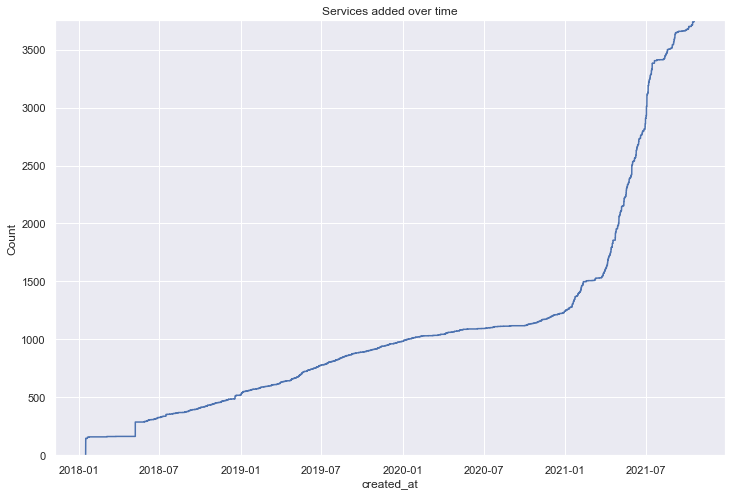

In [4]:
# How have the number of Services grown over time?
plt.figure(figsize=(12,8))
sns.ecdfplot(services, x='created_at', stat='count')
plt.title('Services added over time')

In [5]:
# How many have been comprehensively reviewed?
services.is_comprehensively_reviewed.value_counts()

False    3368
True      384
Name: is_comprehensively_reviewed, dtype: int64

/Users/evan/anaconda3/envs/docbot-server/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Service ratings')

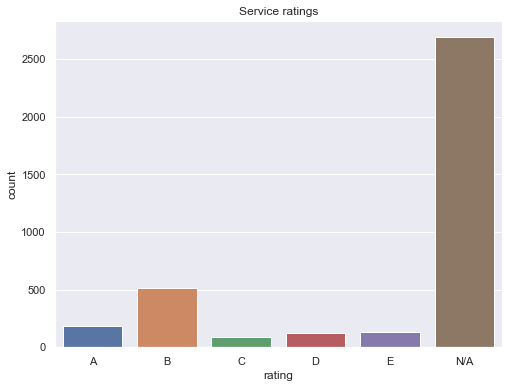

In [6]:
# What are they rated?
plt.figure(figsize=(8,6))
sns.countplot(services.rating, order=['A', 'B', 'C', 'D', 'E', 'N/A'])
plt.title('Service ratings')

In [7]:
documents.info()
documents.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6515 entries, 1149 to 9224
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              6515 non-null   int64         
 1   name            6515 non-null   object        
 2   url             6515 non-null   object        
 3   xpath           6223 non-null   object        
 4   text            6515 non-null   object        
 5   created_at      6515 non-null   datetime64[ns]
 6   updated_at      6515 non-null   datetime64[ns]
 7   service_id      6515 non-null   int64         
 8   reviewed        218 non-null    object        
 9   user_id         3269 non-null   float64       
 10  crawler_server  3226 non-null   object        
 11  lang            6492 non-null   object        
 12  doc_len         6515 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 712.6+ KB


,id,name,url,xpath,text,created_at,updated_at,service_id,reviewed,user_id,crawler_server,lang,doc_len
id,,,,,,,,,,,,,
1149,1149,social.privacytools.io Privacy Policy,https://social.privacytools.io/terms,/html/body/div/div[2]/div/div[1]/div,\nPrivacy <p>Please review our privacy stateme...,2019-04-06 02:39:01.465351,2020-12-14 19:29:56.243824,1472,None,NaN,None,en,2940.0
1136,1136,Privacy Policy,https://www.privacytools.io/privacy-policy/,/html/body/div/main,<ol>\n<li>\n<i>\n</i> Home </li>\n<li> Privac...,2019-03-31 20:35:03.776236,2020-12-14 21:32:47.849675,1472,None,NaN,None,en,7542.0
2169,2169,Privacy Policy,https://www.billtrack50.com/privacy-policy,None,"&lt;iframe src=""https://www.googletagmanager.c...",2019-11-27 20:21:01.498279,2020-12-14 23:27:23.768990,2022,None,3480.0,None,en,345.0
2170,2170,Terms of Use,https://www.billtrack50.com/terms-of-use,None,"&lt;iframe src=""https://www.googletagmanager.c...",2019-11-27 20:24:44.161988,2020-12-14 23:27:09.889537,2022,None,3480.0,None,en,345.0
2123,2123,Privacy Policy,https://mrichard333.com/Privacy-policy,,<ul>\n<li>Home</li>\n<li>Videos</li>\n<li>Con...,2019-11-11 16:04:52.941473,2020-12-15 00:51:52.643832,1728,None,3877.0,None,en,8720.0


In [8]:
# Most common Document names
documents.name.value_counts().head(15)

Privacy Policy          1756
Terms of Service         596
Terms of Use             382
Cookie Policy            200
Terms and Conditions     183
Privacy Policy           126
Terms                     88
Privacy policy            67
 Privacy Policy           62
Terms & Conditions        59
Privacy Statement         54
Privacy Notice            50
Privacy                   47
Terms of use              33
PRIVACY POLICY            28
Name: name, dtype: int64

In [9]:
# Document languages
documents.lang.value_counts()

en       6027
de        112
fr        102
nl         42
es         34
zh-cn      31
it         26
ru         24
ca         13
pt         11
ko          9
ro          9
ja          6
no          5
tr          5
el          4
da          4
et          4
bg          4
cs          3
pl          3
id          3
hu          2
sv          2
fi          2
hr          1
sw          1
cy          1
tl          1
ar          1
Name: lang, dtype: int64

count      6515.000000
mean      22348.580967
std       30961.892665
min           1.000000
25%        5988.500000
50%       14811.000000
75%       29567.000000
max      830858.000000
Name: doc_len, dtype: float64


Text(0.5, 1.0, 'Document length (num characters)')

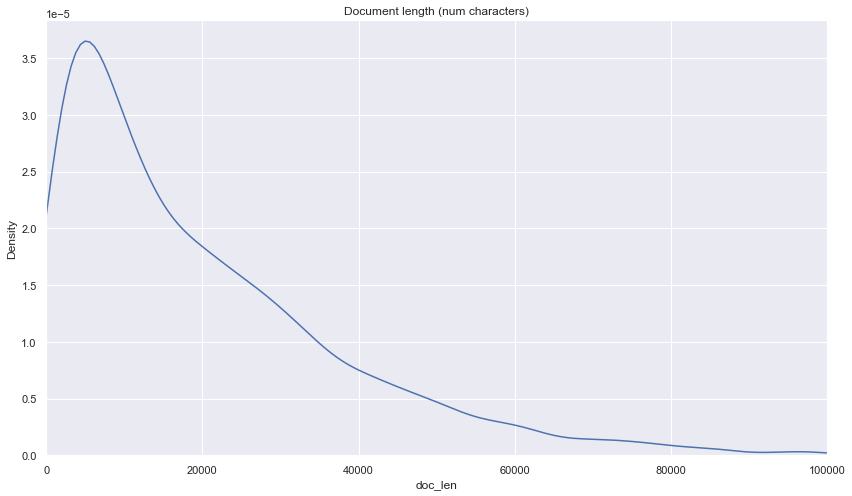

In [10]:
# Document lengths
documents['doc_len'] = documents.text.str.len()
print(documents.doc_len.describe())

# Graph the density (with outliers filtered so the x-axis is not stretched)
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim((0,100000))
sns.kdeplot(documents.doc_len[documents.doc_len < 100000], ax=ax)
plt.title('Document length (num characters)')

In [11]:
# Not sure what `reviewed` is based on, but most values are null/NaN
documents.reviewed.value_counts()

True     147
False     71
Name: reviewed, dtype: int64

In [12]:
documents.crawler_server.value_counts()

eu            2310
us             734
nosypeeper      73
floppy          49
atlas           20
avidreader      19
whale           10
arachne          6
james            5
Name: crawler_server, dtype: int64

In [13]:
# Do a join to attach Service info to Documents
documents = pd.merge(documents, services, left_on='service_id', right_index=True, suffixes=['_doc', '_service'])

In [14]:
# Most Services have 1 or 2 documents, but some have a lot more
print(f"Documents per Service stats:\n{documents.service_id.value_counts().describe()}")
documents.groupby(['service_id', 'name_service']).size().sort_values(ascending=False).head(15)

Documents per Service stats:
count    3058.000000
mean        2.130477
std         1.446340
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        25.000000
Name: service_id, dtype: float64


service_id  name_service                       
190         Amazon                                 25
1559        HERE Technologies | HERE               19
1448        TikTok                                 17
3133        SailPoint                              15
3918        Optimum                                14
2308        Rakuten                                14
230         PayPal                                 13
2887        Albertsons Companies,(Subsidiaries)    12
3917        Rise Broadband                         12
1566        Intercom                               11
186         Flickr                                 11
312         Stack Overflow                         11
239         Disqus                                  9
284         JustPark                                9
389         Lumen (Century Link)                    9
dtype: int64

In [15]:
topics.head()

,id,title,subtitle,description,created_at,updated_at,oldId
id,,,,,,,
27,27,Ownership,What happens with the content you generate on ...,The content and the data you generate on servi...,2018-01-16 15:26:04.444207,2018-01-16 15:26:04.444207,ownership
31,31,Governance,Your relationship with the service and the com...,description,2018-01-16 15:26:04.535299,2018-01-16 15:26:04.535299,governance
32,32,Guarantee,Some services will guarantee you certain featu...,description,2018-01-16 15:26:04.551182,2018-01-16 15:26:04.551182,guarantee
35,35,User Involvement in Changing Terms,Are changes proposed as a request for feedback...,"The terms are a contract between two parties, ...",2018-01-16 15:26:04.629039,2018-01-16 15:26:04.629039,changes-involvement
38,38,Changes,Changes to the Terms,description,2018-01-16 15:26:04.682205,2018-01-16 15:26:04.682205,changes


In [16]:
print(cases.info())
print(f"\nScore:\n{cases.score.describe()}")
cases.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 175 to 178
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               245 non-null    int64         
 1   classification   245 non-null    object        
 2   score            245 non-null    int64         
 3   title            245 non-null    object        
 4   description      245 non-null    object        
 5   topic_id         245 non-null    int64         
 6   created_at       245 non-null    datetime64[ns]
 7   updated_at       245 non-null    datetime64[ns]
 8   privacy_related  78 non-null     object        
 9   docbot_regex     62 non-null     object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 21.1+ KB
None

Score:
count    245.000000
mean      36.918367
std       22.993082
min        0.000000
25%       20.000000
50%       40.000000
75%       50.000000
max      100.000000
Name: score, d

,id,classification,score,title,description,topic_id,created_at,updated_at,privacy_related,docbot_regex
id,,,,,,,,,,
175,175,good,50,You can delete your content from this service,You can ask the service to remove your content...,45,2018-01-16 15:26:09.452580,2021-02-27 14:23:56.238878,None,NaN
130,130,bad,50,A license is kept on user-generated content ev...,The service may still use your content and dis...,30,2018-01-16 15:26:08.388050,2021-05-06 08:26:06.196896,True,NaN
129,129,bad,60,This service tracks you on other websites,The service may use tracking technologies in t...,25,2018-01-16 15:26:08.370367,2021-02-24 22:56:35.859683,True,NaN
237,237,neutral,0,You agree to comply with the law of the servic...,"By using the service, you agree to comply with...",28,2018-07-22 09:09:08.496243,2021-05-06 08:35:07.855459,None,NaN
173,173,bad,25,This service retains rights to your content ev...,The service may still use your content and dis...,45,2018-01-16 15:26:09.415729,2021-02-27 15:51:22.501620,None,NaN


In [18]:
# What do the regexes look like?
# Many were empty string instead of NaN/None, so replace those and see how many are left
cases.docbot_regex = cases.docbot_regex.replace('', np.nan)
print(cases.docbot_regex.dropna().head(15))
print(f"\n{len(cases.docbot_regex.dropna())} out of {len(cases)} have regex")

id
146     ^((?=.*indemnify))((?=.*defend))((?=.*harmless))
147                  ^((?=.*survive))((?=.*termination))
162    ^(((?=.*non-refundable))|((?=.*not )((?=.*refu...
149    ^(((?=.*liability)|(?=.*not be liable))(((?=.*...
155    ^(((?=.*DMCA)|(?=.*wrongly))((?=.*counter-noti...
143    ^((?=.*individual)|(?=.*personal))((?=.*non\-c...
285    ^((?=.*interfere)|(?=.*inhibit)|(?=.*disrupt)|...
284                  ^((?=.*unauthorized)(?=.*computer))
184    ^((?=.*portability)|(?=.*copy of your informat...
192    ^((((?=.*do not)|(?=.*don't)|(?=.*does not))((...
201    ^(((?=.*account)|(?=.*membership)|(?=.*access)...
328    ^((?=.*username)|(?=.*user name)|(?=.*user ID)...
286            ^((?=.*\"as is\")|(?=.*\"as available\"))
292    ^(?=.*user content)((?=.*we do not)|(?=.*does ...
293    ^((?=.*liable)|(?=.*liability))(((?=.*incident...
Name: docbot_regex, dtype: object

62 out of 245 have regex


In [19]:
print(points.info())
points.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18667 entries, 4513 to 21774
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           18667 non-null  int64         
 1   user_id                      18667 non-null  int64         
 2   title                        18667 non-null  object        
 3   source                       18667 non-null  object        
 4   status                       18667 non-null  object        
 5   analysis                     18667 non-null  object        
 6   created_at                   18667 non-null  datetime64[ns]
 7   updated_at                   18667 non-null  datetime64[ns]
 8   service_id                   18667 non-null  int64         
 9   quoteText                    17339 non-null  object        
 10  case_id                      18667 non-null  int64         
 11  point_change                 3122 non-

,id,user_id,title,source,status,analysis,created_at,updated_at,service_id,quoteText,case_id,point_change,quoteStart,quoteEnd,service_needs_rating_update,document_id,lang
id,,,,,,,,,,,,,,,,,
4513,4513,690,You maintain ownership of your data,http://www.wikihow.com/wikiHow:Terms-of-Use,approved,"In the terms of service, the service states ""W...",2018-08-17 02:07:17.108290,2018-08-20 07:38:08.819545,315,We claim no ownership rights over User Content...,183,None,13131.0,13439.0,False,215.0,en
6138,6138,1,You waive your right to a class action.,http://www.wikihow.com/wikiHow:Terms-of-Use,approved,Generated through the annotate view,2019-03-19 12:59:54.265448,2019-03-19 16:28:46.902551,315,"YOU AGREE THAT, BY ENTERING INTO THIS AGREEMEN...",117,None,45864.0,46015.0,False,215.0,en
10245,10245,18120,Your personal data is given to third parties,https://www.wikihow.com/wikiHow:Privacy-Policy,approved,Generated through the annotate view,2020-09-15 09:10:46.892510,2020-10-08 02:16:19.001929,315,"We may share certain service type information,...",188,None,18075.0,18479.0,False,1097.0,en
5619,5619,1853,This service is only available to users of a c...,http://www.wikihow.com/wikiHow:Terms-of-Use,approved,Generated through the annotate view,2019-02-01 18:21:56.533680,2019-02-04 09:28:57.520157,315,Any use of the Service by anyone under 13 is s...,152,None,4401.0,4659.0,False,215.0,en
4721,4721,178,Users agree not to submit illegal content,http://www.wikihow.com/wikiHow:Terms-of-Use,approved,Generated through the annotate view,2018-10-07 06:59:01.263090,2018-10-07 14:18:25.898498,315,contains any information or content that is il...,238,None,14418.0,14469.0,False,215.0,en


In [17]:
# Point languages
points.lang.value_counts()

en       16144
fr         562
es         163
zh-cn      154
de         137
nl          36
ru          30
tr          20
it          19
pt          18
ro          16
ko          12
cs           7
ja           5
et           5
hu           4
el           4
ca           2
da           1
Name: lang, dtype: int64

In [20]:
# We don't have names associated with user ids, but who has made the most points?
points.groupby('user_id').size().sort_values(ascending=False).head(20)

user_id
20760    6836
20149    1777
22324    1130
22961     717
2527      663
1         643
21799     306
22226     281
4         252
2390      224
22605     224
2130      218
6166      218
20783     199
53        146
23355     137
22158     133
1838      104
5244       96
568        86
dtype: int64

Text(0.5, 1.0, 'Points added over time')

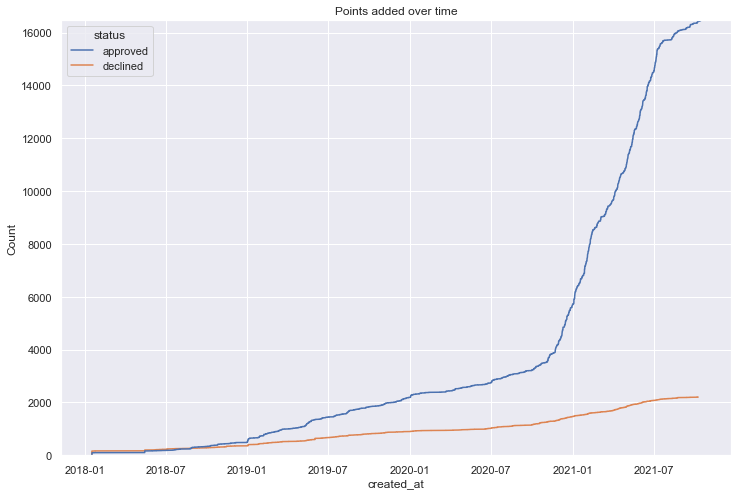

In [21]:
# How have the number of Points grown over time?
plt.figure(figsize=(12,8))
sns.ecdfplot(points, x='created_at', hue='status', stat='count')
plt.title('Points added over time')

In [22]:
# For what Services do we have the most Points? What's the distribution of Points-per-Service?

# To have human readable Service names, join the tables (drop `id` so it's not confusing, since it refers to service id)
points = pd.merge(points, cases, left_on='case_id', right_index=True, suffixes=['_point', '_case'])
points = pd.merge(points, services, left_on='service_id', right_index=True, suffixes=['_point', '_service'])
#points = points.drop('id', axis=1)

print(f"Points per Service stats:\n{points.service_id.value_counts().describe()}")
points.groupby(['service_id', 'name']).size().sort_values(ascending=False).head(15)

Points per Service stats:
count    1247.000000
mean       14.969527
std        16.660640
min         1.000000
25%         3.000000
50%         9.000000
75%        22.000000
max       105.000000
Name: service_id, dtype: float64


service_id  name                           
536         Discord                            105
1553        Speedtest by Ookla                 103
2428        Prezi                               95
230         PayPal                              93
219         Instagram                           88
1815        Khan Academy                        88
217         Google                              87
182         Facebook                            86
2453        iFunny                              82
1364        Brilliant                           78
225         Spotify                             77
194         Reddit                              77
2120        Alibaba                             75
297         GitHub & Global Privacy Control     74
200         Twitch                              73
dtype: int64

In [23]:
# What about approved points only?
approved_points = points[points.status == 'approved']
print(f"Approved points per Service stats:\n{approved_points.service_id.value_counts().describe()}")
approved_points.groupby(['service_id', 'name']).size().sort_values(ascending=False).head(15)

Approved points per Service stats:
count    1175.000000
mean       14.010213
std        15.147933
min         1.000000
25%         3.000000
50%         8.000000
75%        21.000000
max        89.000000
Name: service_id, dtype: float64


service_id  name                           
2428        Prezi                              89
2453        iFunny                             80
1815        Khan Academy                       78
1553        Speedtest by Ookla                 78
219         Instagram                          75
1364        Brilliant                          73
217         Google                             71
2454        The Walt Disney Company            69
2461        Merriam-Webster                    69
297         GitHub & Global Privacy Control    68
3262        Privacy                            68
4521        Gettr                              67
200         Twitch                             67
536         Discord                            66
2120        Alibaba                            65
dtype: int64

In [24]:
# What are the distribution of Point counts per Case? What Cases have the most and least approved Points?
print(f"Points per Case stats:\n{points.case_id.value_counts().describe()}\n")
print(points.groupby(['case_id', 'title_case']).size().sort_values(ascending=False).head(15))
points.groupby(['case_id', 'title_case']).size().sort_values(ascending=False).tail(10)

Points per Case stats:
count    245.000000
mean      76.191837
std       80.872344
min        1.000000
25%       22.000000
50%       49.000000
75%      105.000000
max      613.000000
Name: case_id, dtype: float64

case_id  title_case                                                                                                         
331      There is a date of the last update of the agreements                                                                   613
152      This service is only available to users over a certain age                                                             385
286      The service is provided 'as is' and to be used at your sole risk                                                       359
323      You are tracked via web beacons, tracking pixels, browser fingerprinting, and/or device fingerprinting                 306
163      The court of law governing the terms is in location X                                                                  289
1

case_id  title_case                                                            
141      Inconvenient process for obtaining personal data                          3
497      Prices and fees may be changed at any time, without notice to you         3
491      All Traffic is unencrypted (no https)                                     2
494      An audio version of the Terms of Service is provided                      2
212      Pseudonyms are allowed due to the service's billing policies              1
309      You have the right to request lower Charges from Third Party Providers    1
378      Service fines users for Terms of Service violations                       1
330      The service disables software that you are not licensed to use.           1
495      This service is only available for commercial use                         1
496      You can’t close your account if an investigation is ongoing               1
dtype: int64

In [25]:
# There are quite a few Points not associated with a doc
print(f"Docless Points: {len(points[points.document_id.isna()])}")
docless_approved = points[(points.status == 'approved') & (points.document_id.isna())]
print(f"Approved docless Points: {len(docless_approved)}")
print(f"Approved docless Points grouped by Case:")
print(docless_approved.groupby(['case_id', 'title_case']).size().sort_values(ascending=False).head(10))
docless_approved.head()

Docless Points: 1328
Approved docless Points: 782
Approved docless Points grouped by Case:
case_id  title_case                                                                                            
199      The terms for this service are easy to read                                                               37
331      There is a date of the last update of the agreements                                                      20
193      Your personal data is not sold                                                                            14
128      Third-party cookies are used for advertising                                                              14
195      You can request access, correction and/or deletion of your data                                           14
163      The court of law governing the terms is in location X                                                     13
323      You are tracked via web beacons, tracking pixels, browser fingerprinting, and/or

,id_point,user_id_point,title_point,source,status,analysis,created_at_point,updated_at_point,service_id,quoteText,...,url,created_at,updated_at,wikipedia,keywords,related,slug,is_comprehensively_reviewed,user_id_service,rating
id,,,,,,,,,,,,,,,,,,,,,
4280,4280,435,easy to read,https://about.qwant.com/legal/privacy/,approved,easy to read,2018-06-09 07:47:42.197731,2018-06-26 08:51:35.009982,527,NaN,...,"qwant.com,qwantjunior.com",2018-06-09 07:31:51.624829,2021-03-25 03:19:36.108592,https://en.wikipedia.org/wiki/Qwant,None,None,qwant,True,NaN,B
4931,4931,1004,The terms for this service are easy to read,https://todoist.com/privacy,approved,,2018-11-01 22:56:15.568223,2020-11-18 16:22:42.336584,809,None,...,todoist.com,2018-11-01 22:41:52.795155,2021-03-25 03:19:38.734350,https://en.wikipedia.org/wiki/Draft:Todoist,None,None,todoist,False,NaN,C
11157,11157,20783,The service provides a complete list of all co...,https://about.deviantart.com/policy/privacy/,approved,"The Privacy Policy states, ""Please check out t...",2020-11-08 22:09:26.198844,2020-11-28 17:09:31.557934,192,None,...,deviantart.com,2018-01-16 15:26:05.686813,2021-05-14 14:37:59.267933,https://en.wikipedia.org/wiki/DeviantArt,,,deviantart,True,NaN,B
6074,6074,395,This service does not force users into binding...,https://observablehq.com/terms-of-service,approved,,2019-03-13 14:01:20.652022,2019-06-23 00:36:08.424787,1447,None,...,observablehq.com,2019-03-13 13:18:15.484146,2021-03-25 03:19:43.912348,,None,None,observable,True,NaN,D
1120,1120,7,The service uses your personal data for advert...,https://www.facebook.com/privacy/explanation,approved,"Collects all data you send (username, email, c...",2018-01-16 20:56:54.907566,2019-01-27 16:35:02.999854,182,None,...,"facebook.com,facebookcorewwwi.onion,messenger....",2018-01-16 15:26:05.533031,2021-04-04 19:23:11.724806,https://en.wikipedia.org/wiki/Facebook,social network,diaspora,facebook,True,NaN,E


/Users/evan/anaconda3/envs/docbot-server/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Quote lengths (num characters)')

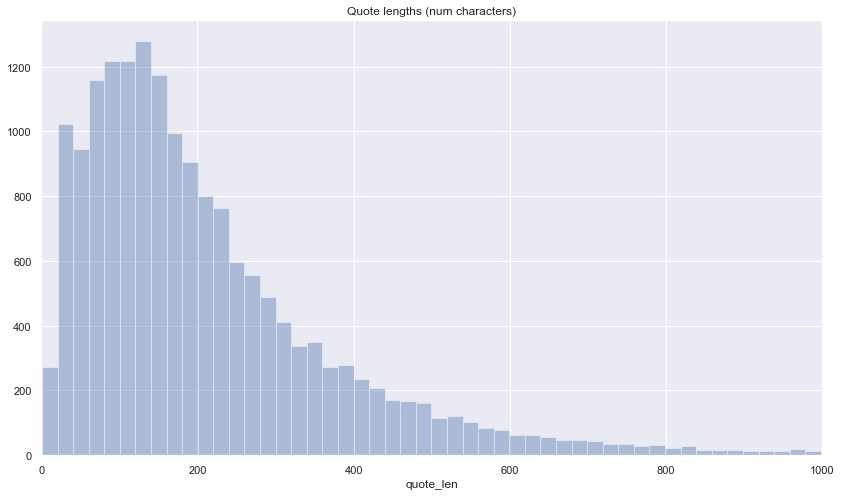

In [26]:
# What is the distribution of quote lengths?
points['quote_len'] = points.quoteEnd - points.quoteStart
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim((0,1000))
sns.distplot(points.quote_len[points.quote_len < 1000], ax=ax, kde=False, norm_hist=False)
plt.title('Quote lengths (num characters)')